# What is Batch Normalization?

Batch Normalization (BN) is an algorithm method which makes the training of deep neural network (DNN) faster and more stable

It consists of normalizing activating vectors from hidden layers using the mean and varience of the current batch. This normalization step is applied right before (or right after) the non linear function

### Advantages

1. Stable
2. Wider Range of Value in hyper parameter tunning
3. Faster (can be set learning rate higher)
4. regularizer (prevent overfiitting)

In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [79]:
df = pd.read_csv('concertriccir2.csv')

In [80]:
df = df.rename(columns={
    '7.003345706103683010e-01': 'X',
    '-2.470675778972781789e-01': 'Y',
    '0.000000000000000000e+00': 'class'
})

In [81]:
df.head()

,X,Y,class
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


In [82]:
df.shape

(499, 3)

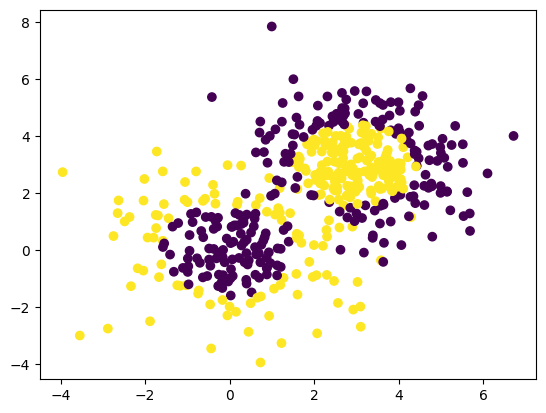

In [83]:
plt.scatter(df['X'], df['Y'], c=df['class'])

In [84]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [85]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.initializers import HeNormal, GlorotUniform

In [86]:
model1 = Sequential()

model1.add(Dense(16, activation='relu', input_dim=2, kernel_initializer=HeNormal()))
model1.add(Dense(6, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform()))

model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 16)                48        
                                                                 
 dense_44 (Dense)            (None, 6)                 102       
                                                                 
 dense_45 (Dense)            (None, 4)                 28        
                                                                 
 dense_46 (Dense)            (None, 1)                 5         
                                                                 
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________


In [88]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [89]:
history1 = model1.fit(X, y, epochs=1000, validation_split=0.2)

Epoch 1/1000
13/13 [==============================] - 1s 23ms/step - loss: 0.7130 - accuracy: 0.5188 - val_loss: 0.7873 - val_accuracy: 0.4300
Epoch 2/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.6926 - accuracy: 0.5288 - val_loss: 0.7594 - val_accuracy: 0.4300
Epoch 3/1000
13/13 [==============================] - 0s 16ms/step - loss: 0.6858 - accuracy: 0.5464 - val_loss: 0.7457 - val_accuracy: 0.4400
Epoch 4/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.6805 - accuracy: 0.5614 - val_loss: 0.7386 - val_accuracy: 0.4400
Epoch 5/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.6775 - accuracy: 0.5865 - val_loss: 0.7338 - val_accuracy: 0.4500
Epoch 6/1000
13/13 [==============================] - 0s 10ms/step - loss: 0.6761 - accuracy: 0.6090 - val_loss: 0.7278 - val_accuracy: 0.4600
Epoch 7/1000
13/13 [==============================] - 0s 11ms/step - loss: 0.6727 - accuracy: 0.6115 - val_loss: 0.7214 - val_accuracy: 0.4600

## using batch normalization

In [67]:
model2 = Sequential()

model2.add(Dense(20, activation='relu', input_dim=2, kernel_initializer=HeNormal()))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(15, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(5, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(3, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Dense(1, activation='sigmoid', kernel_initializer=GlorotUniform()))

model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 20)                60        
                                                                 
 batch_normalization_13 (Bat  (None, 20)               80        
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_38 (Dense)            (None, 15)                315       
                                                                 
 batch_normalization_14 (Bat  (None, 15)               60        
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 15)              

In [68]:
from tensorflow.keras.optimizers import Adam

In [69]:
optimizer = Adam(learning_rate=0.0005)

In [72]:
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [73]:
history2 = model2.fit(X, y, epochs=2000, validation_split=0.2)

Epoch 1/2000
13/13 [==============================] - 3s 58ms/step - loss: 0.9410 - accuracy: 0.5138 - val_loss: 0.7023 - val_accuracy: 0.4400
Epoch 2/2000
13/13 [==============================] - 0s 22ms/step - loss: 0.9473 - accuracy: 0.5338 - val_loss: 0.7021 - val_accuracy: 0.4600
Epoch 3/2000
13/13 [==============================] - 0s 26ms/step - loss: 0.9686 - accuracy: 0.5013 - val_loss: 0.6987 - val_accuracy: 0.4500
Epoch 4/2000
13/13 [==============================] - 0s 24ms/step - loss: 0.8319 - accuracy: 0.5589 - val_loss: 0.6846 - val_accuracy: 0.4700
Epoch 5/2000
13/13 [==============================] - 0s 16ms/step - loss: 0.8542 - accuracy: 0.5464 - val_loss: 0.6636 - val_accuracy: 0.6300
Epoch 6/2000
13/13 [==============================] - 0s 15ms/step - loss: 0.8511 - accuracy: 0.5539 - val_loss: 0.6469 - val_accuracy: 0.7400
Epoch 7/2000
13/13 [==============================] - 0s 17ms/step - loss: 0.8290 - accuracy: 0.5514 - val_loss: 0.6422 - val_accuracy: 0.7200

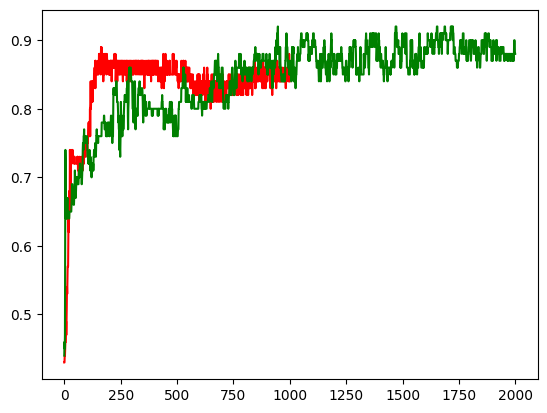

In [90]:
plt.plot(history1.history['val_accuracy'], color='red')
plt.plot(history2.history['val_accuracy'], color='green')

In [91]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 40s 4ms/step


<Axes: >

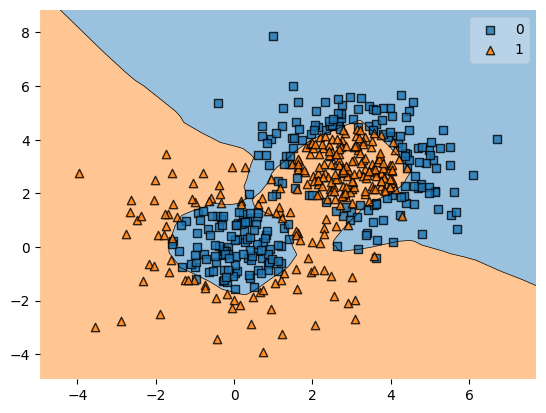

In [92]:
plot_decision_regions(X.values, y.values.astype(np.int_), clf=model2)

9600/9600 [==============================] - 17s 2ms/step


<Axes: >

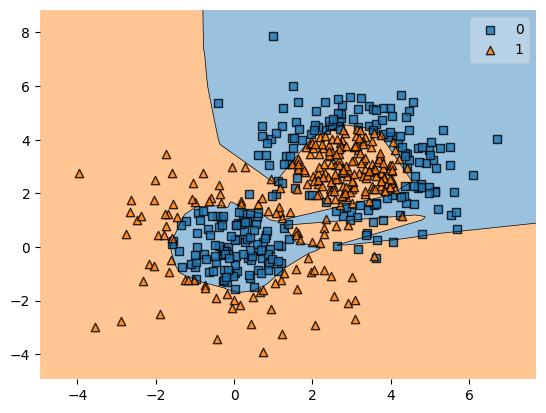

In [93]:
plot_decision_regions(X.values, y.values.astype(np.int_), clf=model1)